## 매니폴드(Manifold) 시각화 해보기

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 스위스 롤(Swiss Roll)이란?
- 3차원 공간에서 2차원의 평면을 말아놓은 형태의 데이터 구조
- 롤케이크 모양처럼 2D 시트가 말려있는 구조
- 매니폴드 학습 알고리즘의 성능을 평가하는 대표적인 합성 데이터셋

### 지역 선형 임베딩(Locally Linear Embedding, LLE)

> LLE는 t-SNE, UMAP과 같은 다른 비선형 차원 축소 기법과 함께 고차원 데이터 분석에 유용한 도구입니다.

지역 선형 임베딩은 비선형 차원 축소 기법 중 하나로, 매니폴드 학습 알고리즘에 속합니다. 이 알고리즘은 데이터의 지역적 구조를 보존하면서 고차원 데이터를 저차원으로 매핑합니다.

#### 작동 원리

LLE는 다음과 같은 3단계 과정으로 작동한다.

1. **근접 이웃 찾기**: 각 데이터 포인트에 대해 k개의 가장 가까운 이웃을 찾는다.

2. **지역 재구성 가중치 계산**: 각 데이터 포인트를 그 이웃들의 선형 조합으로 표현한다. 즉, 각 포인트 Xi가 이웃들의 가중 합으로 가장 잘 재구성되는 가중치 Wij를 계산한다.

3. **저차원 임베딩 찾기**: 고차원 공간에서 계산한 가중치를 보존하는 저차원 공간의 표현을 찾는다.

#### 특징

- **비선형성**: 데이터의 비선형 구조를 효과적으로 포착한다.
- **지역적 구조 보존**: 각 데이터 포인트와 그 이웃 간의 관계를 보존한다.
- **비지도 학습**: 레이블 없이 데이터 구조만을 기반으로 한다.
- **매개변수 민감성**: 이웃 수(n_neighbors)에 민감하게 반응할 수 있다.

#### scikit-learn의 구현

```python
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, random_state=42)
X_reduced = lle.fit_transform(X)
```

- 주요 매개변수
    - `n_neighbors`: 각 점의 재구성에 사용할 이웃 수
    - `n_components`: 출력 차원 수
    - `method`: 구현 방식('standard', 'modified', 'hessian', 'ltsa' 중 하나)
    - `reg`: 정규화 매개변수

#### 장단점

##### 장점
- 비선형 관계를 잘 포착함
- 데이터의 지역적 특성을 잘 보존함
- 최적화 문제의 전역 최적해를 보장함

##### 단점
- 이웃 수 선택에 민감함
- 큰 데이터셋에서 계산 비용이 높음
- 매우 복잡한 매니폴드에서는 성능이 저하될 수 있음
- 새로운 데이터에 대한 추론(out-of-sample extension)이 내장되어 있지 않음

#### 활용 사례

- 이미지 데이터의 차원 축소
- 유전자 발현 데이터 분석
- 스위스 롤과 같은 인공 데이터에서 원래 매니폴드 구조 복원
- 복잡한 데이터셋의 시각화


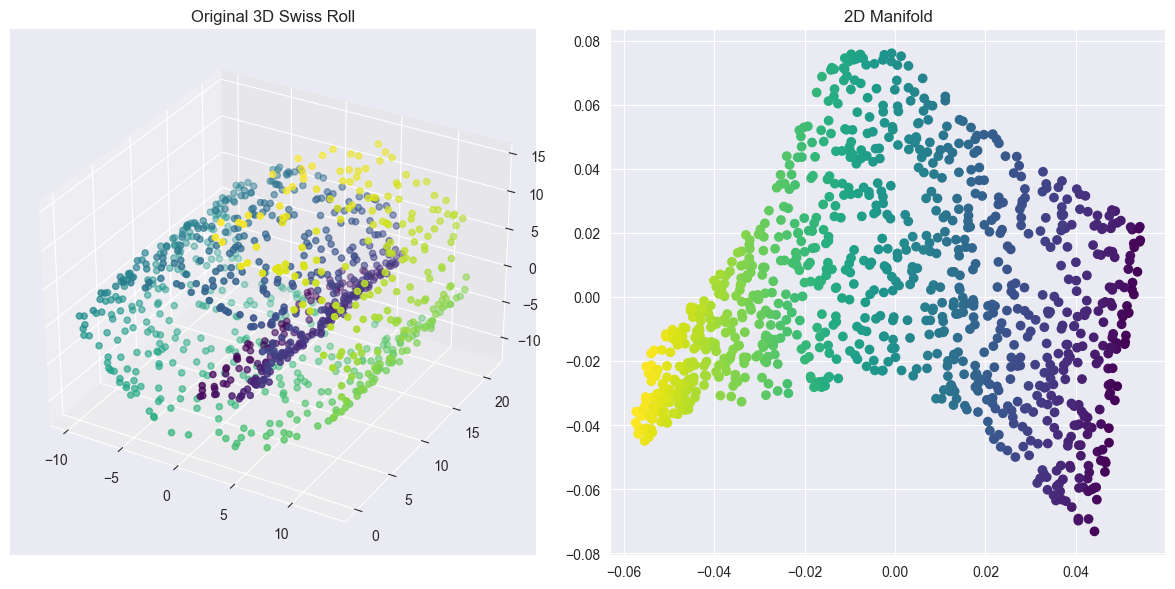

In [2]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding


# 스위스 롤 데이터 생성 (3D)
n_samples = 1000
X, color = make_swiss_roll(n_samples, noise=0.2, random_state=42)

# 매니폴드 학습을 통한 차원 축소 (2D)
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, random_state=42)
X_reduced = lle.fit_transform(X)

# 시각화
fig = plt.figure(figsize=(12, 6))

# 원본 3D 데이터
ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap="viridis")
ax1.set_title("Original 3D Swiss Roll")

# 차원 축소된 2D 데이터
ax2 = fig.add_subplot(122)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap="viridis")
ax2.set_title("2D Manifold")

plt.tight_layout()
plt.show()
# 출력: 3D 스위스 롤과 2D로 펼쳐진 매니폴드 시각화

### 이미지 데이터에서 랜덤하게 샘플링한 데이터 시각화해보기

In [3]:
from sklearn.datasets import fetch_olivetti_faces


# Olivetti 얼굴 데이터셋 불러오기
faces_dataset = fetch_olivetti_faces()

In [4]:
faces_images = faces_dataset.images
faces_data = faces_dataset.data

# 데이터 형태 확인
print(f"이미지 형태: {faces_images.shape}")  # (400, 64, 64) - 400장의 64x64 이미지
print(f"데이터 형태: {faces_data.shape}")  # (400, 4096) - 400장의 이미지를 펼친 형태(64*64=4096)

이미지 형태: (400, 64, 64)
데이터 형태: (400, 4096)


In [5]:
total_image_num = faces_images.shape[0]
# 랜덤하게 얼굴 이미지 고르기
random_faces = faces_images[np.random.choice(total_image_num, size=6)]
random_faces.shape

(6, 64, 64)

In [6]:
def show_gray_image_array(flattened_axes, images: np.ndarray, title: str = ""):
    for idx, ax in enumerate(flattened_axes):
        ax.imshow(images[idx], cmap="gray")
        ax.axis("off")
        if not title:
            continue
        ax.set_title(f"{title} {idx + 1}")

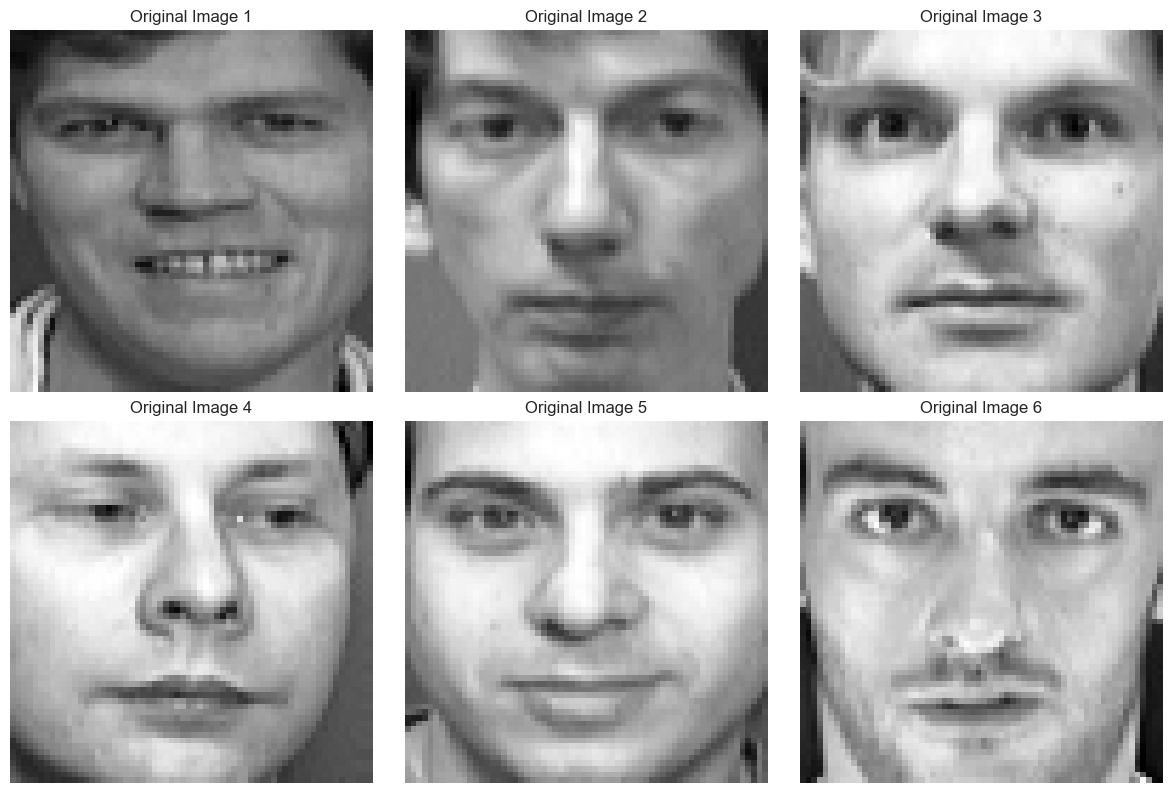

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

show_gray_image_array(axes.flatten(), images=random_faces, title="Original Image")

plt.tight_layout()
plt.show()

무작위로 픽셀 값을 선택하여 32x32 이미지 생성

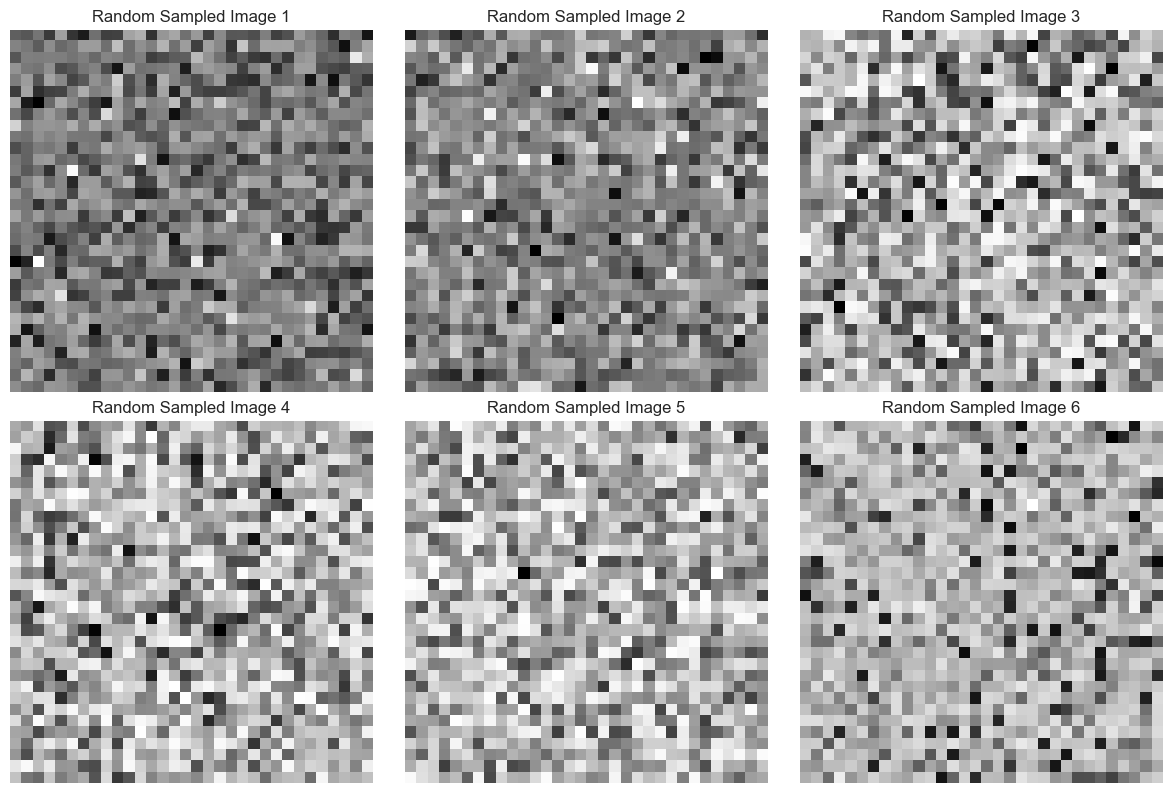

In [8]:
n_samples = len(random_faces)  # 랜덤 샘플링할 이미지 수
random_sampled_images = np.zeros((n_samples, 32, 32))

for i in range(n_samples):
    # 이미지에서 무작위로 32 x 32(1024)개의 픽셀 값 선택
    random_face_image = random_faces[i]
    all_pixel_values = random_face_image.flatten()

    random_indices = np.random.randint(0, len(all_pixel_values), size=32 * 32)
    random_pixels = all_pixel_values[random_indices]

    # 32 x 32 이미지 형태로 재구성
    random_sampled_images[i] = random_pixels.reshape(32, 32)

# 무작위로 생성된 이미지 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

show_gray_image_array(axes.flatten(), images=random_sampled_images, title="Random Sampled Image")

plt.tight_layout()
plt.show()

## PCA 와 SVD 의 관계

In [9]:
import numpy as np
from sklearn.datasets import load_iris

In [10]:
# 데이터 로드
iris = load_iris()
X = iris.data
print("데이터의 shape:", X.shape)
X_centered = X - np.mean(X, axis=0)  # 데이터 중심화

데이터의 shape: (150, 4)


In [11]:
# 방법 1: PCA (고유값 분해 사용)
cov_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# 내림차순 정렬
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

eigenvalues.shape, eigenvectors.shape

((4,), (4, 4))

In [12]:
# 방법 2: SVD
U, singular_values, Vt = np.linalg.svd(X_centered, full_matrices=False)

In [13]:
# 관계 확인: 고유값 = 특이값의 제곱
print("PCA 고유값:")
print(eigenvalues)
print()

print("SVD 특이값의 제곱:")
print(singular_values**2 / (X_centered.shape[0] - 1))  # 샘플 수 보정

PCA 고유값:
[4.22824171 0.24267075 0.0782095  0.02383509]

SVD 특이값의 제곱:
[4.22824171 0.24267075 0.0782095  0.02383509]


In [14]:
# 주성분 방향 비교: PCA 고유벡터 vs SVD 오른쪽 특이벡터
print("PCA 첫 번째 주성분(고유벡터):")
print(eigenvectors[:, 0])
print()
print("SVD 첫 번째 오른쪽 특이벡터:")
print(Vt[0])  # 부호가 반대일 수 있음

PCA 첫 번째 주성분(고유벡터):
[-0.36138659  0.08452251 -0.85667061 -0.3582892 ]

SVD 첫 번째 오른쪽 특이벡터:
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


위 고유벡터 `[-0.36138659, 0.08452251, -0.85667061, -0.3582892]`는 다음과 같이 해석할 수 있다.

1. **고유벡터의 원소 의미**: 이 값들은 원래 특성(feature)들이 첫 번째 주성분에 어떻게 기여하는지를 나타낸다. 아이리스 데이터셋에는 4개의 특성이 있다.
    - 꽃받침 길이(sepal length)
    - 꽃받침 너비(sepal width)
    - 꽃잎 길이(petal length)
    - 꽃잎 너비(petal width)

2. **각 특성의 기여도**
    - 꽃받침 길이: -0.36138659
    - 꽃받침 너비: 0.08452251
    - 꽃잎 길이: -0.85667061
    - 꽃잎 너비: -0.3582892

3. **해석**
    - 절대값이 클수록 해당 특성이 주성분에 더 큰 영향을 미친다.
    - 따라서 꽃잎 길이(-0.85667061)가 첫 번째 주성분에 가장 큰 영향을 미치고 있다.
    - 꽃받침 너비(0.08452251)는 상대적으로 영향이 적다.

4. **부호의 의미**
    - 같은 부호를 가진 특성들은 같은 방향으로 움직이는 경향이 있다.
    - 반대 부호를 가진 특성들은 반대 방향으로 움직이는 경향이 있다.
    - 여기서는 꽃받침 너비만 양수이고 나머지는 모두 음수다. 이는 꽃받침 너비가 다른 특성들과 반대 방향으로 변화한다는 것을 의미한다.

5. **주성분의 방향**
    - 이 벡터는 데이터의 분산이 가장 큰 방향을 나타낸다.
    - 첫 번째 주성분은 데이터의 변동성을 가장 많이 설명하는 축이다.

아이리스 데이터셋에서 이 주성분은 주로 꽃잎 길이의 변화를 설명하며, 꽃받침 길이와 꽃잎 너비도 어느 정도 영향을 미치고 있다.

## PCA 와 t-SNE 비교해보기

- mnist 데이터셋을 2차원 축소 뒤 시각화를 했을 때, 두 알고리즘이 어떻게 차이가 나는지 보자.
- mnist 데이터셋은 0 ~ 9 까지의 숫자에 대한 흑백 손글씨 이미지로 크기가 28x28 이다.

In [15]:
import time

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [16]:
# MNIST 데이터셋 일부 로드
mnist = fetch_openml("mnist_784", version=1, parser="auto")
X = mnist.data[:3000] / 255.0  # 정규화
y = mnist.target[:3000].astype(int)

random_state = 1234

X.shape, y.shape

((3000, 784), (3000,))

In [17]:
# PCA 적용
t0 = time.time()
pca = PCA(n_components=2, random_state=random_state)  # 2차원으로 축소
X_pca = pca.fit_transform(X)
t_pca = time.time() - t0
print(f"PCA 실행 시간: {t_pca:.2f}초")

PCA 실행 시간: 0.02초


In [18]:
# t-SNE 적용
t0 = time.time()
tsne = TSNE(n_components=2, random_state=random_state)  # 2차원으로 축소
X_tsne = tsne.fit_transform(X)
t_tsne = time.time() - t0
print(f"t-SNE 실행 시간: {t_tsne:.2f}초")

t-SNE 실행 시간: 4.44초


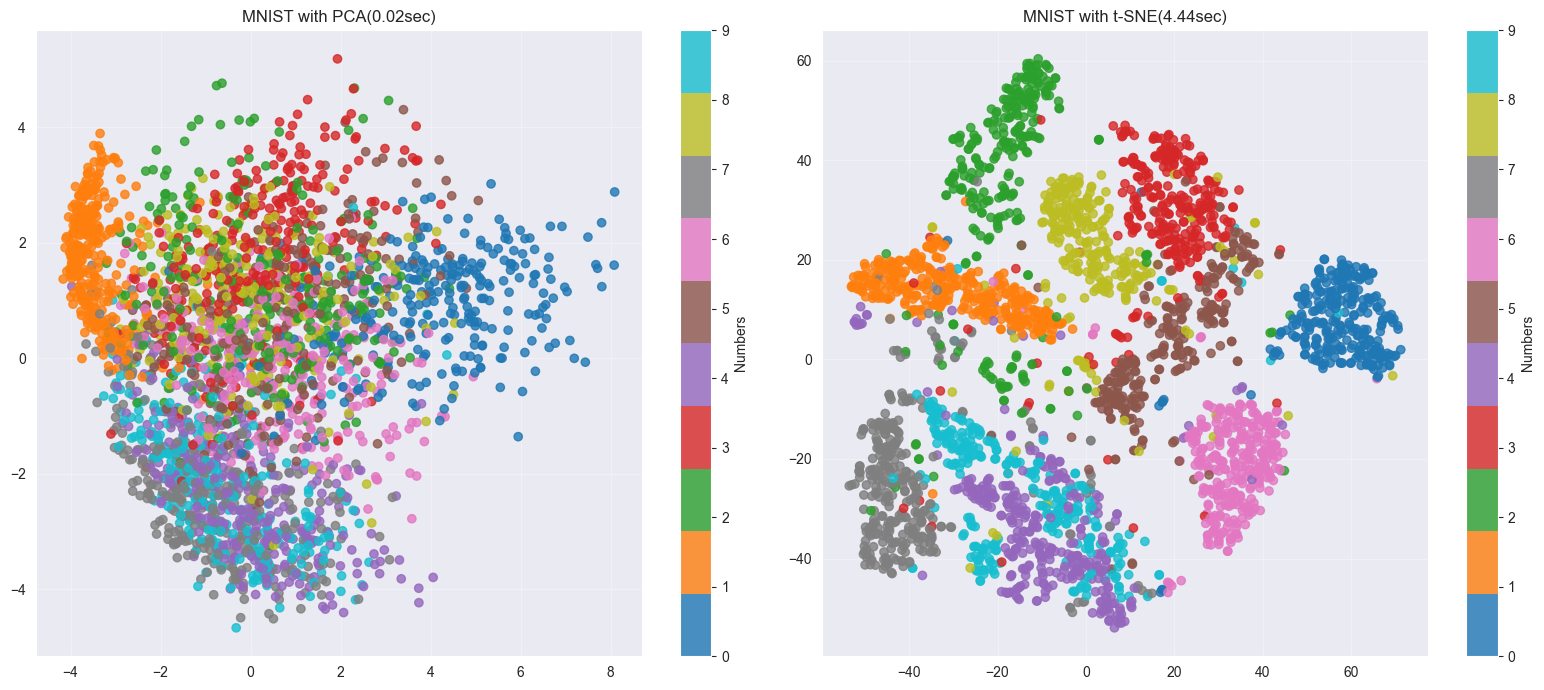

In [19]:
# 결과 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# PCA 결과
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", alpha=0.8)
ax1.set_title(f"MNIST with PCA({t_pca:.2f}sec)")
ax1.grid(alpha=0.3)
fig.colorbar(scatter1, ax=ax1, label="Numbers")

# t-SNE 결과
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10", alpha=0.8)
ax2.set_title(f"MNIST with t-SNE({t_tsne:.2f}sec)")
ax2.grid(alpha=0.3)
fig.colorbar(scatter2, ax=ax2, label="Numbers")

plt.tight_layout()
plt.show()

- 두 기법의 시각적 결과 비교
    - PCA는 선형 기법으로 계산이 빠르지만, 비선형 관계를 잘 포착하지 못할 수 있다.
    - t-SNE는 비선형 기법으로 계산이 느리지만, 복잡한 구조를 더 잘 보존할 수 있다.
    - MNIST 데이터에서 t-SNE는 일반적으로 같은 숫자끼리 더 잘 군집화하는 경향이 있다.

일반적으로 t-SNE는 PCA보다 계산 비용이 크지만, 고차원 데이터의 군집 구조를 더 잘 보존하는 경향이 있다.

## 군집화(Clustering)

- 다양한 군집화 알고리즘의 시각화

In [20]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.mixture import GaussianMixture

In [21]:
# 데이터셋 생성
n_samples = 1000
random_state = 4321

# 두 개의 반달 모양 클러스터
X_moons, _ = make_moons(n_samples=n_samples, noise=0.08, random_state=random_state)

# 밀도가 다른 세 개의 클러스터
X_varied, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

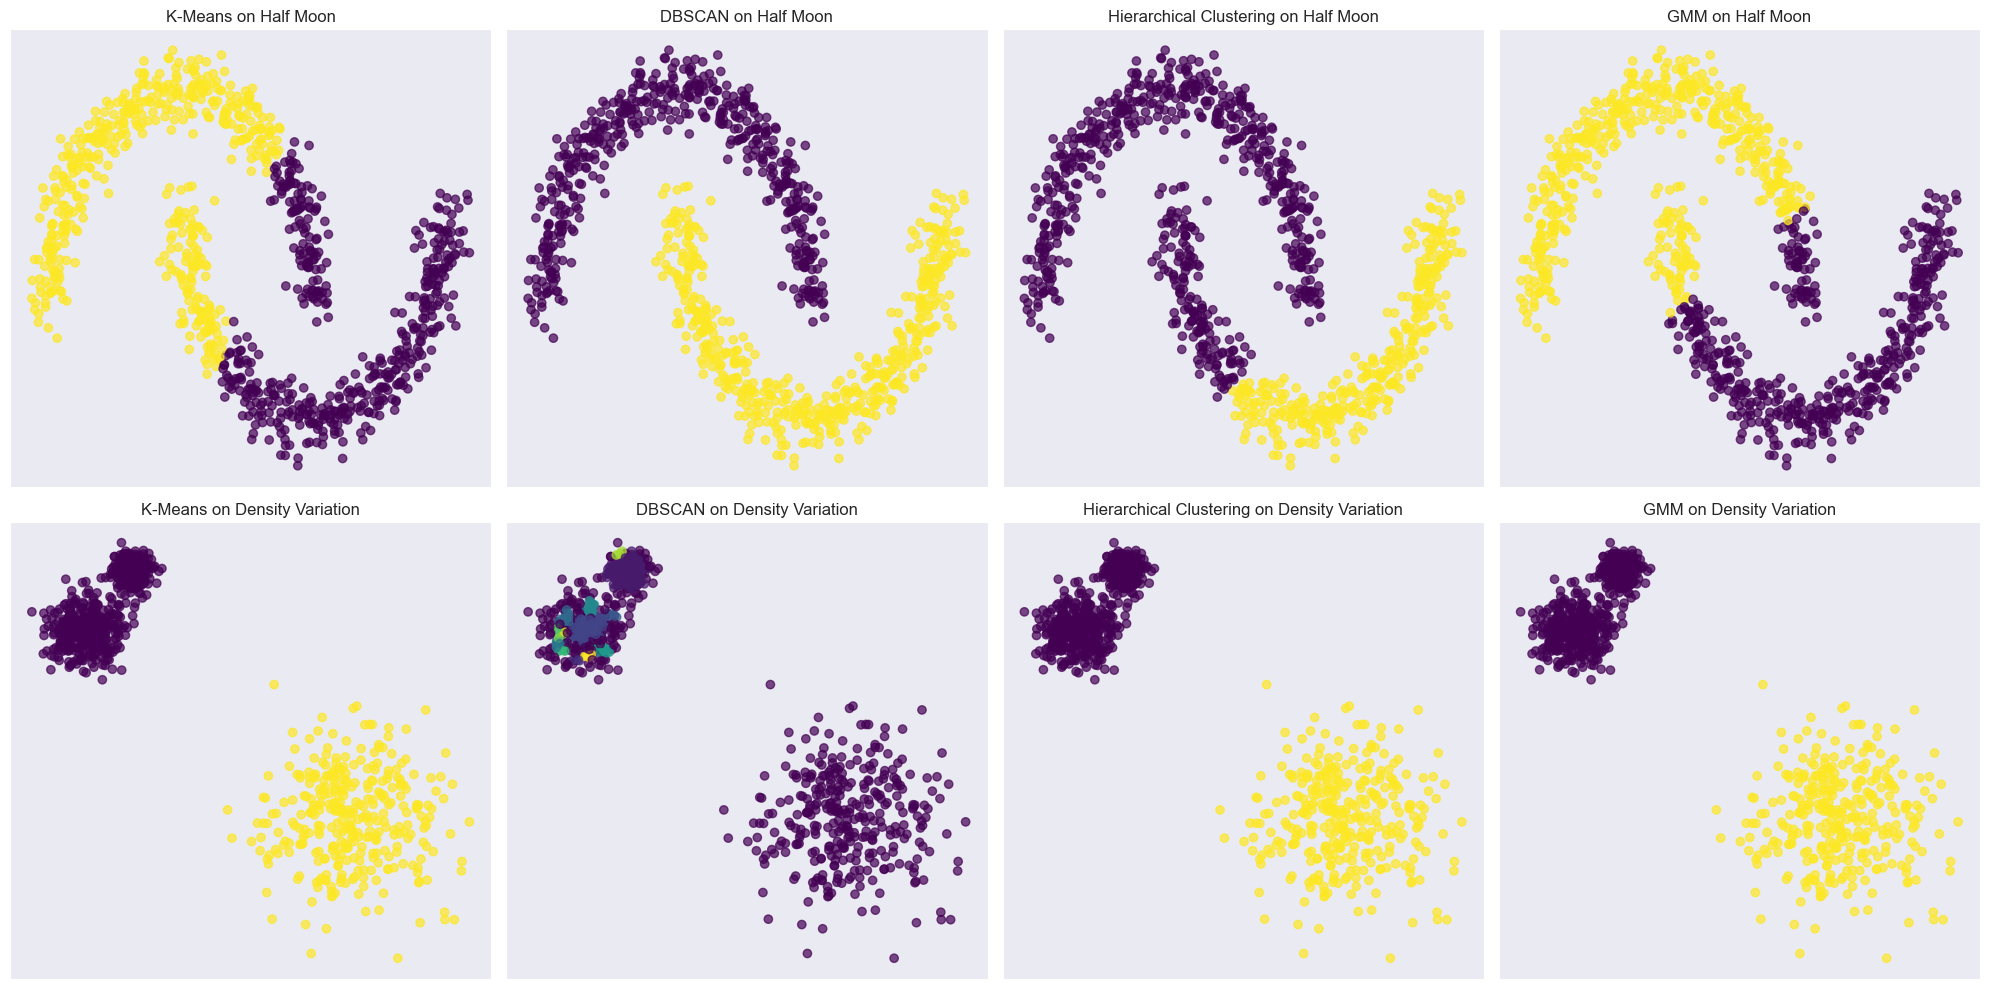

In [22]:
# 알고리즘 설정
algorithms = {
    "K-Means": KMeans(n_clusters=2, random_state=random_state),
    "DBSCAN": DBSCAN(eps=0.2),
    "Hierarchical Clustering": AgglomerativeClustering(n_clusters=2),
    "GMM": GaussianMixture(n_components=2, random_state=random_state),
}

# 결과 시각화
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (X, dataset_name) in enumerate(zip([X_moons, X_varied], ["Half Moon", "Density Variation"], strict=False)):
    for j, (name, algorithm) in enumerate(algorithms.items()):
        ax = axes[i, j]

        # 알고리즘 적용
        clusters = algorithm.fit_predict(X)

        # 시각화
        ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", alpha=0.7)
        ax.set_title(f"{name} on {dataset_name}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

## SVD(Singular Value Decomposition)

특이값 행렬분해, SVD란 행렬 $M \in{\mathbb{R}^{m \times n}}$를
다음과 같이 특별한 성질을 가진 3개의 행렬들의 곱으로 나타내는 과정을 말한다.

$$M=U\Sigma V^T$$

여기서 3개의 행렬 $U, \Sigma, V$는 각각
1. $U$는 m차원 정규 직교 행렬 (orthonormal matrix)
2. $\Sigma$(sigma)는 singular value를 성분으로 하는 대각 행렬(diagonal matrix)
3. $V$는 n차원 정규 직교 행렬 (orthonormal matrix)

이라는 특성이 있다.

### `numpy.linalgo.svd`

- 행렬의 특이값 분해(Singular Value Decomposition, SVD)를 계산하는 NumPy의 선형 대수 함수입니다.


```python
numpy.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=False)
```

**매개변수**

- `a`: 분해할 행렬, 일반적으로 m×n 형태의 2차원 배열이다.

- `full_matrices`: 불리언 값으로, 기본값은 `True` 이다.
    - `True` 인 경우, U 와 Vh 가 완전한 행렬로 반환된다. (U 는 m×m, Vh 는 n×n)
    - `False` 인 경우, U 의 열과 Vh 의 행은 s의 비-0 특이값의 수까지만 계산된다. (U 는 m×k, Vh 는 k×n, k = min(m,n))

- `compute_uv`: 불리언 값으로, 기본값은 `True` 이다.
    - `True` 인 경우, U와 Vh가 계산된다.
    - `False` 인 경우, 특이값만 계산된다.

- `hermitian`: 불리언 값으로, 기본값은 `False` 이다.
    - `True` 인 경우, a 가 에르미트(Hermitian) 행렬로 간주된다.

**반환값**

- `compute_uv=True` 인 경우 (기본값): `(U, s, Vh)`의 튜플 형태로 반환한다.
    - U: 왼쪽 특이 벡터들을 포함하는 배열
    - s: 특이값들의 배열 (내림차순으로 정렬됨)
    - Vh: 오른쪽 특이 벡터들의 전치행렬(Hermitian 켤레 전치행렬)

- `compute_uv=False` 인 경우: 특이값 s만 반환한다.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
def show_matrix(mat: np.ndarray, size_scale: float = 1.0, title: str | None = None) -> None:
    n_rows, n_cols = mat.shape
    # 행렬 크기에 비례하도록 figure의 사이즈 설정
    figure_size = (size_scale * n_cols, size_scale * n_rows)

    plt.figure(figsize=figure_size)
    sns.heatmap(  # 매트릭스 시각화에서 불필요한 부분들 비활성화
        mat, annot=True, fmt=".2f", cmap="Purples", cbar=False, xticklabels=False, yticklabels=False
    )
    if title:
        plt.title(title)
    plt.show()

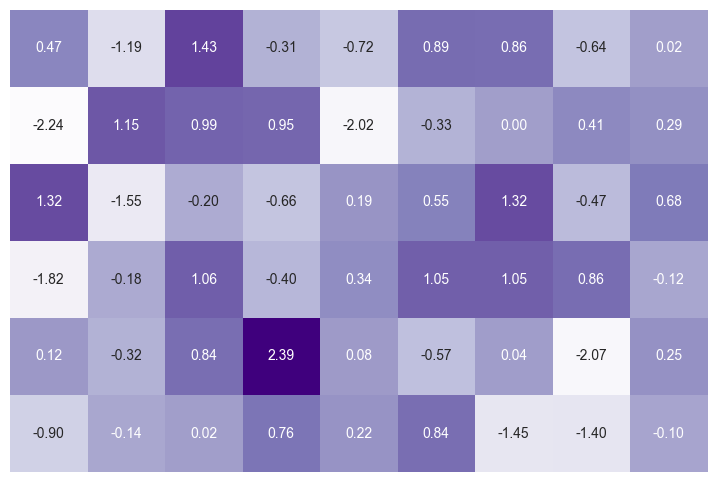

In [25]:
np.random.seed(1234)

matrix = np.random.randn(6, 9)

show_matrix(matrix)

In [26]:
def svd(mat: np.ndarray) -> (np.ndarray, np.ndarray, np.ndarray):
    """
    numpy.linalg.svd 를 진행하면,
    singular_values 가 1D-array 로 나오는데,
    이것을 mxn 으로 복원해서 반환
    """
    u, s_values, v = np.linalg.svd(mat)

    # numpy의 svd 결과로 나오는 sigma의 diagonal 성분을 가지고 diagonal matrix를 복원
    m, n = mat.shape  # matrix 행렬의 차원
    sigma = np.zeros((m, n))  # matrix 행렬과 같은 차원의 zero 행렬을 만든다.

    rank = len(s_values)  # rank 계산
    sigma[:rank, :rank] = np.diag(s_values)  # rank 까지만 복원

    return u, sigma, v.T

In [27]:
U, Sigma, V = svd(matrix)
U.shape, Sigma.shape, V.shape

((6, 6), (6, 9), (9, 9))

가장 큰 오차: 2.6645352591003757e-15


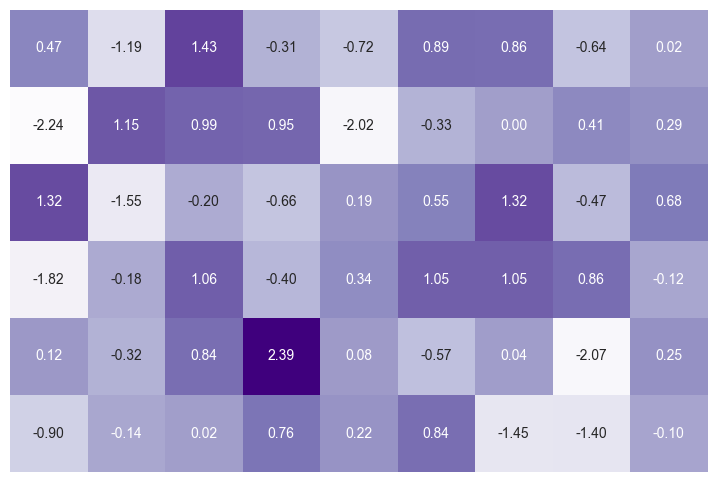

In [28]:
restored_mat = U @ Sigma @ V.T

print("가장 큰 오차:", np.abs(matrix - restored_mat).max())  # 사실상 0

show_matrix(restored_mat)  # 앞의 원래 행렬과 같다.

### U 에 대해서

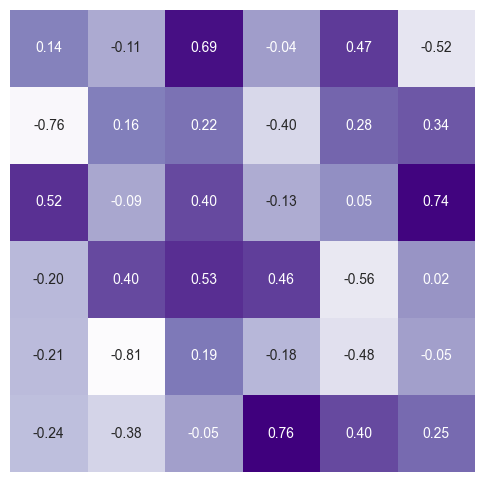

In [29]:
show_matrix(U)

In [30]:
# U 는 직교 행렬이기 때문에,

# 서로 다른 row 끼리 내적(1차원끼리의 행렬 곱)하면 0 이 나옴!
print(U[0].shape, "@", U[1].shape, U[0] @ U[1])

# 같은 row 끼리 내적(vector 의 norm)하면 1 이 나옴!
print(U[1].shape, "@", U[1].shape, U[1] @ U[1])

(6,) @ (6,) -1.1102230246251565e-16
(6,) @ (6,) 1.0000000000000009


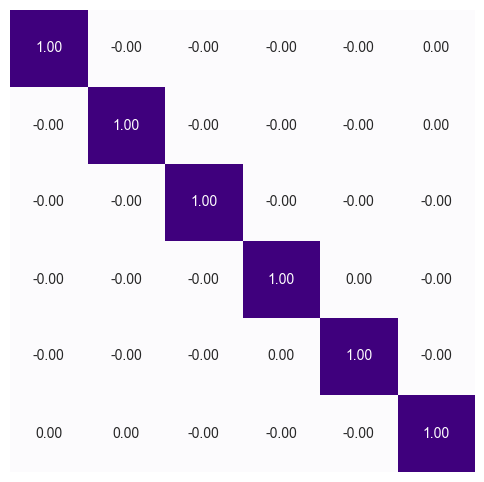

In [31]:
# 직교 행렬의 역행렬은 자신의 전치행렬!
show_matrix(U @ U.T)  # 자신과 자신의 역행렬을 곱해서 단위행렬이 나옴

### Sigma 에 대해서

- singular value 를 대각성분으로 하는 대각 행렬
- 이 대각선 성분은 뒤로갈수록, 값이 작아진다.

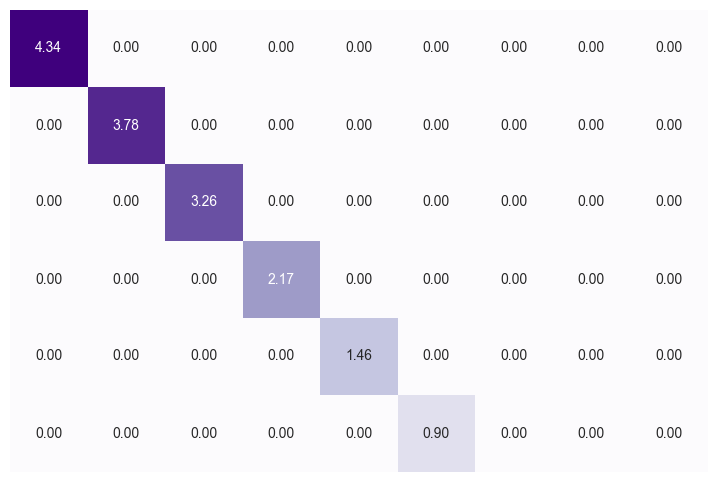

In [32]:
show_matrix(Sigma)

행렬 M이 r개의 singular value 를 가진다고 할 때,

$\Sigma = \Sigma_0 + \Sigma_1 + ... \Sigma_r$이므로,

위의 SVD식을 다음과 같이 적을 수 있다.
(분배법칙)

$$M = U\Sigma V^T = U(\Sigma = \Sigma_0 + \Sigma_1 + ... \Sigma_r)V^T = U\Sigma_0V^T + U\Sigma_1V^T + ... U\Sigma_rV^T$$

#### 행렬의 계수(Rank)의 개념
우선 먼저 알아볼 개념인 행렬의 계수(rank)는 선형대수학에서 매우 중요한 개념이다.

##### 행렬의 계수(Rank)란?
행렬의 계수는 다음과 같이 정의된다.
- **행렬의 선형 독립인 행(또는 열)의 최대 개수**
- 행 공간(row space)의 차원 또는 열 공간(column space)의 차원

쉽게 말해, *행렬에서 서로 독립적인 정보를 담고 있는 행이나 열의 개수*를 의미한다.

##### 계수의 특성
1. **범위**: $m \times n$ 행렬의 계수는 0과 min(m, n) 사이의 값을 가진다.
2. **행과 열의 계수는 같습니다**: 행렬 A의 행 공간의 차원과 열 공간의 차원은 항상 같다.
3. **Full rank**: 행렬의 계수가 가능한 최대값(min(m, n))인 경우, 해당 행렬을 `full rank` 행렬이라고 한다.
4. **Rank deficient**: 계수가 가능한 최대값보다 작은 경우, `rank deficient` 행렬이라고 한다.

##### 예시를 통한 행렬의 계수 이해

**예시 1: Full Rank 행렬**

- 다음 $2 \times 2$ 행렬

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 5 \end{bmatrix} $$

- 이 행렬의 두 행 [1, 2]와 [3, 5]은 서로 선형 독립이다 (하나가 다른 하나의 상수배가 아님).
- 따라서 행렬 A의 계수는 2이다.
- 이는 가능한 최대값인 min(2, 2) = 2와 같으므로 이 행렬은 full rank 이다.

**예시 2: Rank Deficient 행렬**

- 다음 $3 \times 3$ 행렬

$$B = \begin{bmatrix} 1 & 2 & 3 \\ 2 & 4 & 6 \\ 3 & 6 & 9 \end{bmatrix}$$

- 이 행렬에서,
    - 두 번째 행은 첫 번째 행의 2배이다; $[2, 4, 6] = 2 \times [1, 2, 3]$
    - 세 번째 행은 첫 번째 행의 3배이다; $[3, 6, 9] = 3 \times [1, 2, 3]$
- 따라서 실제로 독립적인 행은 하나뿐이므로, 행렬 B의 계수는 1이다.
- 이는 가능한 최대값인 min(3, 3) = 3보다 작으므로 이 행렬은 rank deficient 이다.

**예시 3: $3 \times 2$ 행렬의 계수**

- 다음 직사각형 행렬을 고려해보자

$$C = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}$$

- 이 행렬에서 행들은 선형 독립이다(어떤 행도 다른 행들의 선형 조합으로 표현할 수 없음).
- 그러나 $3 \times 2$ 행렬에서 계수의 최대 가능값은 min(3, 2) = 2이다.
- 따라서 이 행렬의 계수는 2이다.


원래 행렬의 계수(rank): 6
원래 행렬과 결과 행렬의 차이 중 제일 큰 차이: 3.1086244689504383e-15


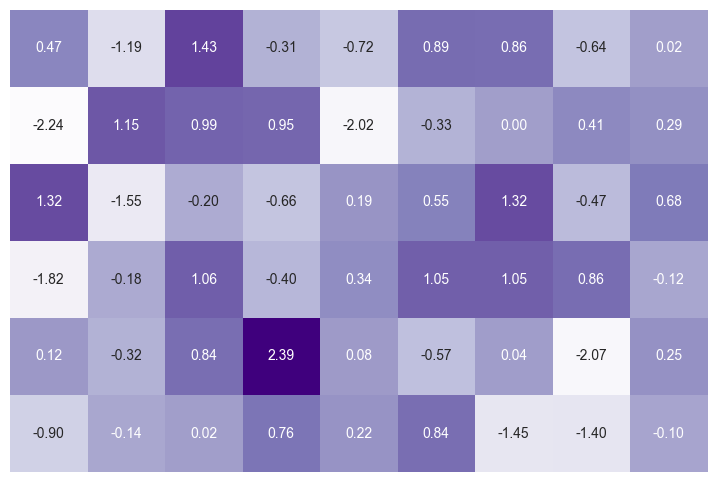

In [33]:
# SVD 의 전개식을 코드로 실행해보기
# 원래 행렬의 rank
r = np.linalg.matrix_rank(matrix)
print("원래 행렬의 계수(rank):", r)

result = np.zeros_like(matrix)
for k in range(r):
    # (k 행,k 열)의 값만 Sigma 에서 가져오고 나머지는 0 인 벡터
    sigma_k = np.zeros_like(Sigma)
    sigma_k[k, k] = Sigma[k, k]
    result += U @ sigma_k @ V.T

# 거의 0
print("원래 행렬과 결과 행렬의 차이 중 제일 큰 차이:", np.abs(matrix - result).max())

show_matrix(result)

그런데, $\Sigma_k$는 결국 (k, k) 원소만 0이 아닌 행렬!

=> 다음과 같이 U와 V의 k번째 열벡터 하나씩만 가지고 계산하더라도, 완전히 동일한 결과를 얻을 수 있다.

다른 계산 결과 행렬의 차이 중 제일 큰 차이: 3.1086244689504383e-15


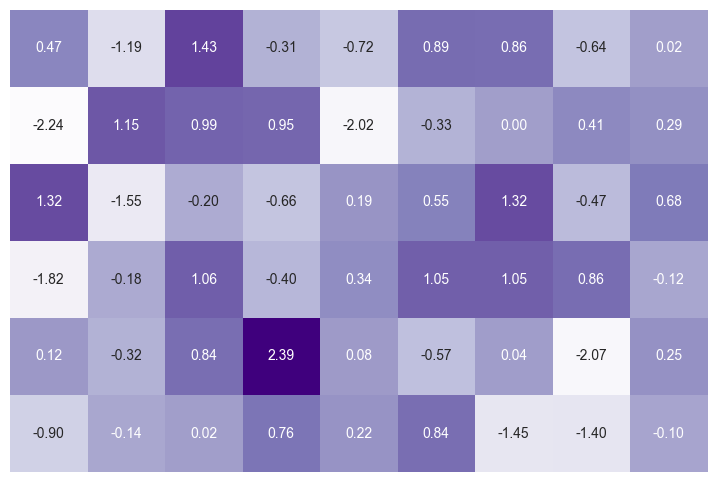

In [34]:
result = np.zeros_like(matrix)

for k in range(r):
    scalar_sig_k = Sigma[k, k]
    # (k 행,k 열)의 값 * U 의 k 열 X V 의 k 열
    result += scalar_sig_k * U[:, [k]] @ V[:, [k]].T

# 거의 0
print("다른 계산 결과 행렬의 차이 중 제일 큰 차이:", np.abs(matrix - result).max())

show_matrix(result)

여기에서 각 단계에 더해진 행렬들처럼,
**두 벡터의 곱으로 표현되는 행렬은 선형대수학에서 rank-1 matrix 라고 부르는 개념**

크기는 행렬이지만 가지고있는 정보량은 곱해지는 벡터 두개와 동일하다는 특성을 가지며, 행렬을 만드는 기본단위처럼 사용되는 개념이다.

U[:, [k]] 의 shape: (6, 1)
V[:, [k]].T 의 shape: (1, 9)
rank1_matrix 의 shape: (6, 9)
rank1_matrix 의 계수(rank): 1


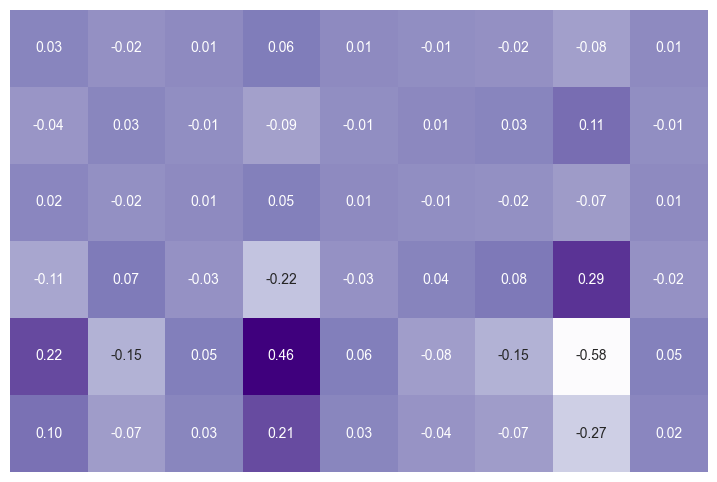

In [35]:
k = np.random.randint(0, r)

rank1_matrix = U[:, [k]] @ V[:, [k]].T

print("U[:, [k]] 의 shape:", U[:, [k]].shape)
print("V[:, [k]].T 의 shape:", V[:, [k]].T.shape)
print("rank1_matrix 의 shape:", rank1_matrix.shape)
print("rank1_matrix 의 계수(rank):", np.linalg.matrix_rank(rank1_matrix))

show_matrix(rank1_matrix)

## TruncatedSVD

TruncatedSVD(절단된 특이값 분해)는,
전체 SVD에서 **가장 중요한** 특이값과 특이 벡터만 유지하는 차원 축소 기법

위에서 rank 가 r 인(SVD 후 singular values 가 r 개) 행렬 M 에 대해서,
$$
M = U\Sigma V^T\\
= U\Sigma_0V^T + U\Sigma_1V^T + ... U\Sigma_rV^T\\
= \text{rank1-matrix}_1 + \text{rank1-matrix}_2 + ... + \text{rank1-matrix}_r
$$

- TruncatedSVD 란, 이를 활용해서 r 개의 성분들 중 **크기가 작은 것들을 버리고**
- 행렬 M 을 낮은 rank 의 행렬로 나타내는 것으로 이해할 수 있다.

- TruncatedSVD vs 일반 SVD
    1. 계산 효율성: TruncatedSVD는 모든 특이값과 특이 벡터를 계산하지 않고 필요한 것만 계산하므로 더 효율적
    2. 메모리 사용: 전체 SVD는 큰 행렬에 대해 많은 메모리를 필요로 하지만, TruncatedSVD는 적은 메모리를 사용
    3. 차원 축소: TruncatedSVD는 본질적으로 차원 축소 기법

In [36]:
# TruncatedSVD 로 차원 축소하는 함수
def reduce_dim_by_truncated_svd(mat: np.ndarray, n_components: int | None = None) -> np.ndarray:
    # 행렬 mat 을 svd 한다.
    u, s, v = svd(mat)

    # 몇 개의 성분을 남길지
    n_components = np.linalg.matrix_rank(mat) if n_components is None else n_components

    if n_components > r:
        raise ValueError("n_components must be less than or equal to the rank of the matrix")

    reduced_mat = np.zeros_like(mat)
    for i in range(n_components):
        # n_components 까지만 더함으로써, 차원 축소
        scalar = s[i, i]
        reduced_mat += scalar * u[:, [i]] @ v[:, [i]].T
    return reduced_mat

In [37]:
reduced_matrix = reduce_dim_by_truncated_svd(matrix, 5)
print("원래 행렬의 rank:", np.linalg.matrix_rank(matrix))
print("차원 축소된 행렬의 rank:", np.linalg.matrix_rank(reduced_matrix))
print("행렬간의 최대 차이:", np.abs(matrix - reduced_matrix).max())

원래 행렬의 rank: 6
차원 축소된 행렬의 rank: 5
행렬간의 최대 차이: 0.4306720751871564


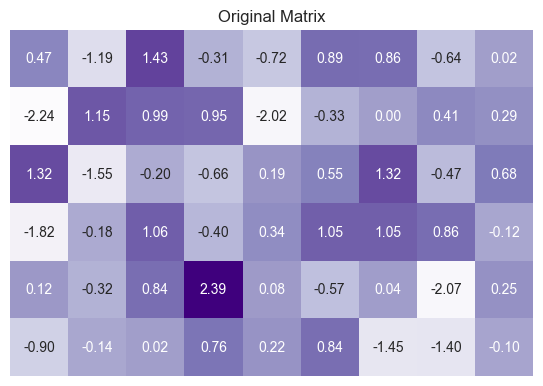

In [38]:
show_matrix(matrix, size_scale=0.75, title="Original Matrix")

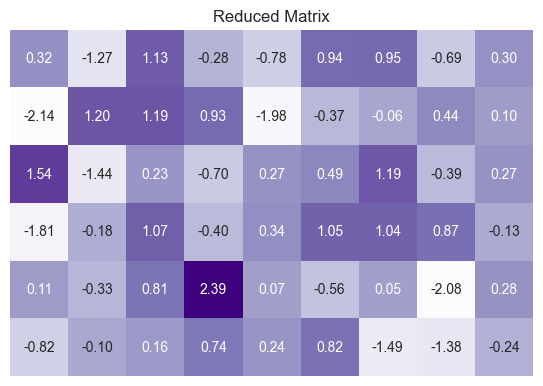

In [39]:
show_matrix(reduced_matrix, size_scale=0.75, title="Reduced Matrix")

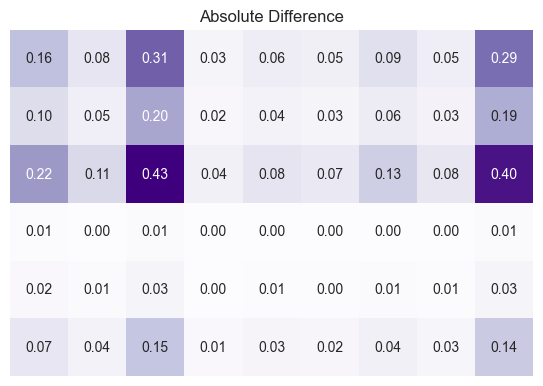

In [40]:
show_matrix(np.abs(matrix - reduced_matrix), size_scale=0.75, title="Absolute Difference")

## PCA 구현 실습

### EigenFace
- 얼굴 인식 분야에서 사용되는 주요 기술로, 주성분 분석(PCA, Principal Component Analysis)을 얼굴 이미지에 적용한 방법
- EigenFace 는 수학적으로 얼굴의 *본질적 특징*을 추출하는 기술
- 'Eigen'은 독일어로 '고유한'이라는 뜻이며, 얼굴 이미지에서 고유벡터(eigenvector)를 추출하여 얼굴을 인식하는 방식

#### 작동 원리
##### 1. 데이터 준비
- 여기서는 "The Olivetti Faces" 를 사용
- [링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

##### 2. 평균 얼굴 계산
- 모든 얼굴 이미지의 평균을 계산하여 "평균 얼굴"을 만든다.

##### 3. 편차 계산
- 각 얼굴 이미지에서 평균 얼굴을 뺀 "편차 이미지"를 계산한다.

##### 4. 공분산 행렬 계산
- 이 편차 이미지들로부터 공분산 행렬을 계산한다.

##### 5. 고유벡터 추출
- 공분산 행렬에서 고유값과 고유벡터를 계산합니다.
- 이 고유벡터들이 바로 EigenFace(아이젠페이스)입니다.

##### 6. 차원 축소
- 고유값이 큰 순서대로 고유벡터를 선택하여 차원을 축소한다.
- 예를 들어, 1800차원의 데이터에서 PCA를 수행하면 1800차원의 주성분 벡터를 얻을 수 있고, 이 중 중요한 몇 개만 선택

#### Reference
- [scikit learn 의 얼굴 데이터셋 차원 축소 튜토리얼](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py)

In [41]:
from sklearn.datasets import fetch_olivetti_faces


random_state = 1234

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=random_state)

n_samples, n_features = faces.shape
print("데이터 수:", n_samples)
print("차원 수:", n_features)  # 크기가 64 X 64 인 2차원 이미지를 1차원으로 flatten 한 것

데이터 수: 400
차원 수: 4096


In [42]:
# 첫번째 데이터 보기
faces[0]  # normalize 되어 있음

array([0.5082645 , 0.5082645 , 0.5082645 , ..., 0.60330576, 0.59504133,
       0.59917355], shape=(4096,), dtype=float32)

In [43]:
print("평균:", faces.mean())
print("최댓값:", faces.max())
print("최솟값:", faces.min())

평균: 0.54704267
최댓값: 1.0
최솟값: 0.0


무작위로 이미지 선택해서 보기

256 번째 사진


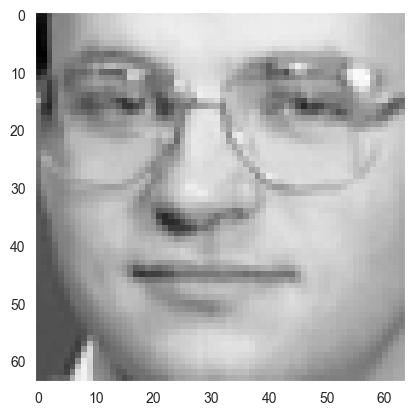

In [44]:
index = np.random.randint(0, n_samples)
print(index, "번째 사진")

# index 번째 이미지를 64 X 64 2차원 배열로 만들어서, pyplot.imshow 호출
plt.imshow(faces[index].reshape(64, 64), cmap="gray")
plt.grid(False)

PCA 분석을 위해서는, feature-wise, sample-wise 로 평균이 모두 0 되어야 함
- Feature-wise 평균이 0
    - 각 특성(열)의 평균이 0이 되도록 조정
    - 즉, 모든 픽셀 위치(특성)별로 평균값을 계산하고 그 값을 빼주는 것
- Sample-wise 평균이 0
    - 각 샘플(행)의 평균이 0이 되도록 조정
    - 각 얼굴 이미지의 평균 픽셀 값을 계산하고 그 값을 빼주는 것

In [45]:
# 전체 샘플 단위의 평균 구하고, 이를 원본 데이터에서 빼기
samplewise_mean = faces.mean(axis=0)  # shape: (4096, 0)
faces_centered = faces - samplewise_mean

# 각 이미지마다 모든 픽셀값의 평균을 구하고, 이를 원본 이미지에서 빼기
pixelwise_mean = faces_centered.mean(axis=1).reshape(n_samples, -1)  # shape: (400, 0)
faces_centered = faces_centered - pixelwise_mean

In [46]:
def show_faces(
    images: np.ndarray,  # 얼굴 이미지 배열 (넘파이 배열 형태)
    title: str,  # 그래프의 제목
    n_rows: int = 2,  # 그리드의 행 수 (기본값: 2)
    n_cols: int = 3,  # 그리드의 열 수 (기본값: 3)
    size_scale: float = 2.0,  # 이미지 크기 배율 (기본값: 2.0)
):
    """이미지 배열에서 여러 얼굴을 그리드 형태로 표시하는 함수"""
    image_shape = ((64, 64),)  # 이미지 형태 (기본값: 64x64 픽셀)

    # 서브플롯 생성 (여러 이미지를 그리드 형태로 표시)
    fig, axes = plt.subplots(
        nrows=n_rows,  # 행 수 설정
        ncols=n_cols,  # 열 수 설정
        figsize=(n_cols * size_scale, n_rows * size_scale),  # 전체 그림 크기 설정
        facecolor="white",  # 배경색을 흰색으로 설정
        constrained_layout=True,  # 레이아웃 자동 조정 활성화
    )
    fig.set_edgecolor("black")  # 그림 테두리 색상을 검정색으로 설정
    fig.suptitle(title)  # 그림 상단에 제목 설정

    # 각 서브플롯에 이미지 표시
    for idx, ax in enumerate(axes.flat):  # axes.flat을 사용하여 2D 배열을 1D로 변환하여 반복
        face = images[idx]  # 인덱스에 해당하는 얼굴 이미지 가져오기
        vmax = max(face.max(), -face.min())  # 컬러맵 스케일링을 위한 최대값 계산
        ax.imshow(
            face.reshape(image_shape),  # 이미지를 지정된 형태로 재구성
            cmap="gray",  # 그레이스케일 컬러맵 사용
            vmin=-vmax,  # 컬러맵의 최소값 설정 (대칭적 스케일링)
            vmax=vmax,  # 컬러맵의 최대값 설정
        )
        ax.axis("off")  # 축 눈금과 레이블 숨기기
    plt.show()  # 그림 화면에 표시

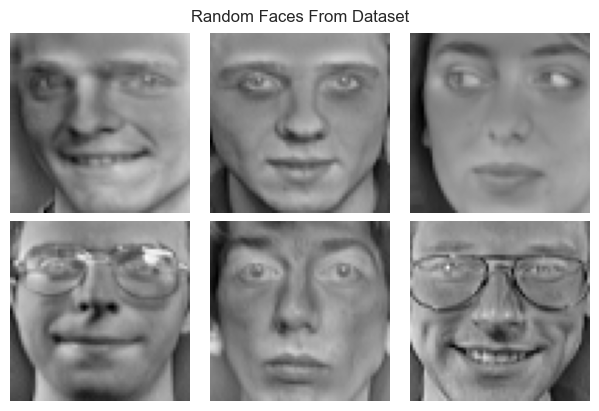

In [47]:
show_faces(faces_centered, "Random Faces From Dataset")

**`sklearn.decomposition.PCA`**

주요 매개변수
- `n_components`: 유지할 주성분 개수
    - **기본값**: `None` (모든 주성분 유지)
    - **옵션**:
        - 정수: 유지할 주성분의 수를 직접 지정
        - 0과 1 사이의 실수: 설명된 분산의 비율(예: 0.95는 분산의 95%를 설명하는 주성분 개수)
        - '': Minka의 MLE 알고리즘으로 자동 계산 `mle`
    - **사용 예시**: `n_components=2`는 첫 2개의 주성분만 유지
- `copy`: 원본 입력 데이터를 복사할지 여부
    - **기본값**: `True`
    - **용도**: `False` 로 설정하면 메모리 사용량을 줄일 수 있지만, 원본 데이터가 변경될 수 있음

- `whiten`: 화이트닝(whitening) 적용 여부
    - **기본값**: `False`
    - **용도**: `True` 로 설정하면 주성분의 스케일을 조정하여 분산이 1이 되도록 함
    - **특징**: 화이트닝은 특성 간 공분산을 제거하고 정규화하지만, 추가 계산이 필요함

- `svd_solver`: SVD(특이값 분해) 계산에 사용할 알고리즘
    - **기본값**: `'auto'`
    - **옵션**:
        - `'auto'`: 데이터 차원에 따라 자동 선택
        - `'full'`: 정확한 전체 SVD 계산
        - `'arpack'`: 일부 주성분만 계산할 때 효율적
        - `'randomized'`: 대규모 데이터셋에 적합한 무작위 알고리즘
    - **용도**: 큰 데이터셋에서는 'randomized'가 더 빠름

- `tol`: svd_solver가 'arpack'일 때 수렴 임계값
    - **기본값**: `0.0`

- `iterated_power`: svd_solver가 'randomized'일 때 반복 횟수
- **기본값**: `'auto'`
- **용도**: 정확도와 실행 시간 사이의 균형 조정

- random_state: 난수 생성을 위한 시드(seed)
    - **기본값**: `None`
    - **용도**: 결과의 재현성을 위해 설정

주요 속성
- `components_`: 주성분 벡터 (특성 공간의 방향 벡터)
- `explained_variance_`: 각 주성분의 분산
- `explained_variance_ratio_`: 각 주성분이 설명하는 분산의 비율
- `singular_values_`: 특이값
- `mean_`: 훈련 데이터의 평균
- `n_components_`: 주성분 개수
- `n_features_`: 입력 특성 개수
- `n_samples_`: 훈련 샘플 개수

주요 메서드
- `fit(X)`: 훈련 데이터로 PCA 모델 학습
- `transform(X)`: 데이터를 주성분 공간으로 변환
- `fit_transform(X)`: 학습과 변환을 한 번에 수행
- `inverse_transform(X)`: 주성분 공간에서 원래 특성 공간으로 역변환


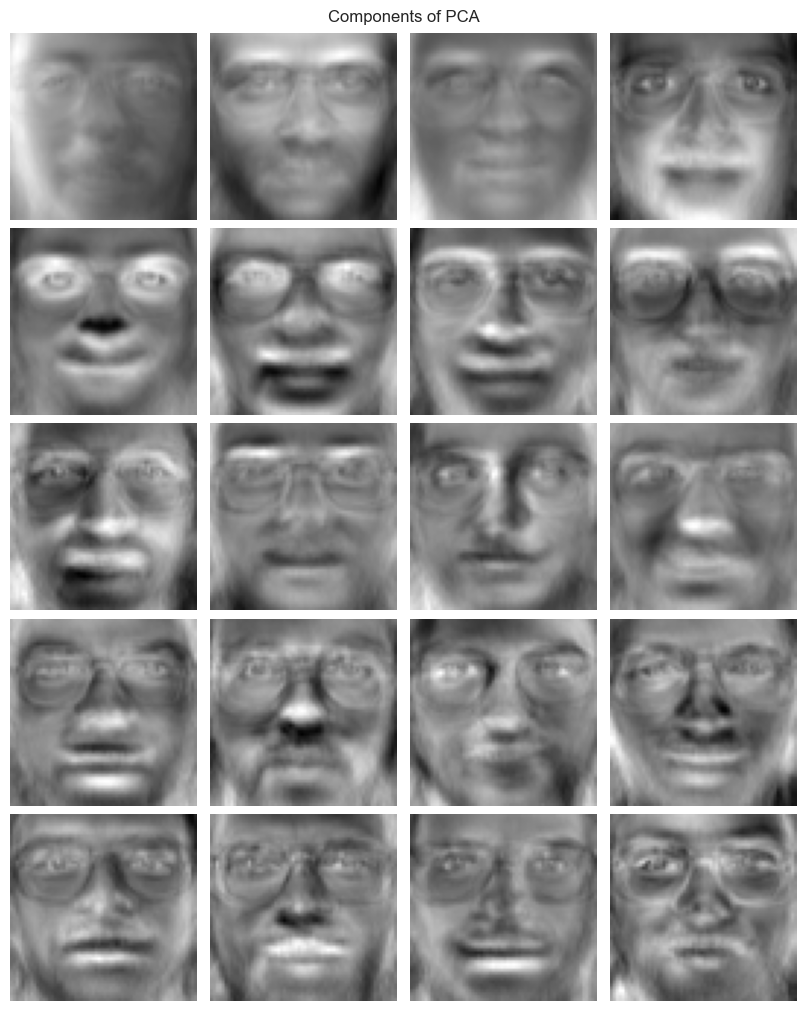

In [48]:
from sklearn.decomposition import PCA


n_components = 20

pca_estimator = PCA(
    n_components=n_components,  # 20 개로 줄임
    svd_solver="full",  # 정확한 전체 SVD 계산
    whiten=True,  # 주성분의 스케일을 조정하여 분산이 1이 되도록 함
)
pca_estimator.fit(faces_centered)

show_faces(pca_estimator.components_, "Components of PCA", n_rows=5, n_cols=4)

원본 이미지와 그 원본 이미지를 차원 축소 벡터와 components_로 변환한 이미지 시각화해보기

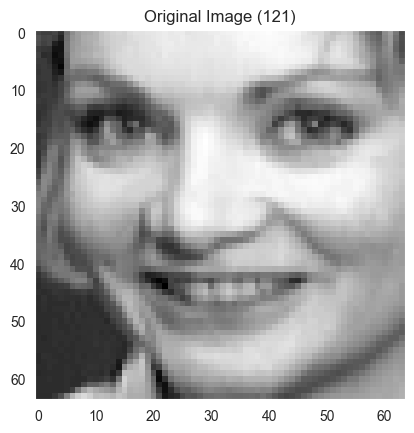

In [49]:
index = np.random.randint(0, n_samples)
original_image = faces[index]
plt.title(f"Original Image ({index})")
plt.imshow(original_image.reshape(64, 64), cmap="gray")
plt.grid(False)

In [50]:
reduced_vector = pca_estimator.transform(faces_centered[index].reshape(1, -1))
print("차원 축소된 벡터 크기:", reduced_vector.shape)
print(reduced_vector)

차원 축소된 벡터 크기: (1, 20)
[[-1.9169251   0.70363885  0.36968458 -0.45811543 -0.09426884 -0.8524174
   0.07995571 -0.9869422  -0.8353684   0.71145713  1.3869272   1.709392
   0.5141601   0.59264743 -1.1601728  -0.2629359  -1.1377829  -0.97790575
  -0.80167943 -1.0049598 ]]


위 reduced_vector 의 원소를 계수로 해서,

fitting 된 PCA component 들과

선형 결합을 하면 다음과 같이 원본 이미지를 복원할 수 있다.

PCA를 통해 차원이 축소된 벡터()를 사용하여 원본 이미지를 복원하는 과정은 다음과 같다.

1. 차원 축소 (인코딩): 고차원 데이터 → 저차원 표현
2. 복원 (디코딩): 저차원 표현 → 고차원 데이터 근사치

**수학적 원리**
수학적으로 PCA는 다음과 같이 작동한다.
1. 원본 데이터 `X`에서 주성분(eigenvectors) `V`를 찾습니다.
2. 차원 축소: `Z = X · V^T` (여기서 `Z`는 위의 `reduced_vector`)
3. 복원: `X' ≈ Z · V` (여기서 `X'`는 복원된 이미지)

각 주성분은 원본 데이터 공간의 방향을 나타내며,
`reduced_vector` 의 각 값은 해당 방향으로의 투영 크기를 나타냅니다.

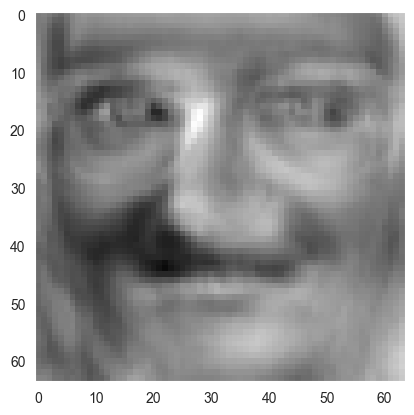

In [51]:
restored_image = np.zeros((64, 64), dtype=np.float64)
for value, component in zip(reduced_vector[0], pca_estimator.components_, strict=False):
    restored_image += value * component.reshape(64, 64)

vmax = max(restored_image.max(), -restored_image.min())
plt.grid(False)
plt.imshow(restored_image, cmap="gray", vmax=vmax, vmin=-vmax)

축소된 차원의 수(n_components) 가 너무 작아 복원된 이미지가 같은 이미지라는 것을 알아보기 힘들다.

이번엔 차원의 수(n_components)에 따라 이미지가 어떤 형태로 나타나는지 비교해보자.

In [52]:
# 비교할 랜덤 이미지 선정
random_image_index = np.random.randint(0, n_samples)
face_image = faces[random_image_index]

# 중앙화된 얼굴 이미지
centered_face_image = faces_centered[random_image_index].reshape(1, -1)

# 원래 이미지 포함 다양한 차원의 이미지를 저장할 리스트
diverse_dim_images = [face_image]

In [53]:
# 5차원, 20차원 10차원으로 축소한 이미지
for n_components in [5, 20, 100]:
    # PCA 수행
    estimator = PCA(n_components=n_components, svd_solver="full", whiten=True)
    estimator.fit(faces_centered)

    # 차원 축소된 벡터 계산
    reduced_dim_vector = estimator.transform(centered_face_image)

    # 축소 차원으로 이미지 복원
    restored_one = np.zeros((64, 64), dtype=np.float64)
    for value, component in zip(reduced_dim_vector[0], estimator.components_, strict=False):
        restored_one += value * component.reshape(64, 64)

    diverse_dim_images.append(restored_one)

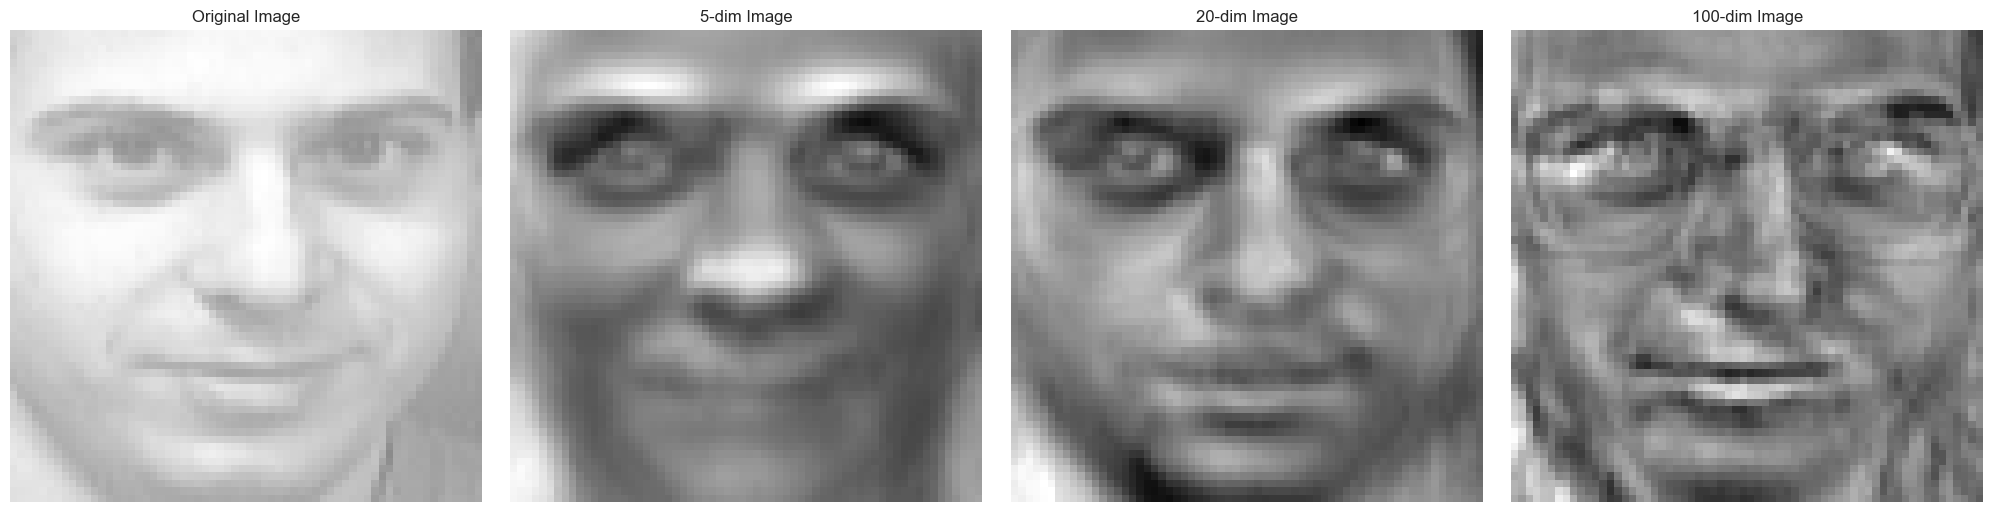

In [54]:
# 다양한 차원의 이미지 시각화
titles = ["Original Image", "5-dim Image", "20-dim Image", "100-dim Image"]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), facecolor="white", constrained_layout=True)
fig.set_edgecolor("black")

for ax, title, img in zip(axes.flat, titles, diverse_dim_images, strict=False):
    vmax = max(img.max(), -img.min())
    ax.imshow(img.reshape(64, 64), cmap="gray", vmax=vmax, vmin=-vmax)
    ax.set_title(title)
    ax.axis("off")
plt.show()

오리지널 이미지에는 안경이 없으나, 안경이 특성으로 선택되었기 때문에 복원한 이미지에서 안경이 보이는 것이다.